## Observations and Insights
Based on the the results from the graphs and analytics of the data, the following observtions stood out:
1. Amove the four drug regimen selected for closer examination, the box plots show that overall the tumor volumes have very little dispersion. Ceftamin have a lot more dispersion than the other three and Infubinol is the only regiment with an outlier. The plots show further that tumore volumes for Ramicane and Infubinol are almost normal while those for Capomulin and Ceftamin have negative/left skewness, with Ceftmin have a greater negative skewness.

2. The analysis also show that on average heavier rabits have larger tumors. This is illustrated by both the scatter plot for the average tumor volume and mouse weight as well as the regression line. This results is based on the four regimens selected for a closer analysis.

3. For the mouse with Mouse ID s185, the tumor volume decreases over time as shown by the line graph of tumor volume and timepoint for that rabbit.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
df['Mouse ID'].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = df[df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_id


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print("Duplicate Rows based on Mouse ID and Timepoint are:", duplicate_id, sep='\n')


Duplicate Rows based on Mouse ID and Timepoint are:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].count()

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = cleaned_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).mean()
mean.columns = ["Mean"]
median = cleaned_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).median()
median.columns = ["Median"]
var = cleaned_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).var()
var.columns = ["Variance"]
stdev = cleaned_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).std()
stdev.columns = ["Standard Deviation"]
sem = cleaned_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).sem()
sem.columns = ["SEM"]

mean_med = mean.merge(median, on='Drug Regimen')
mean_med_var = mean_med.merge(var, on='Drug Regimen')
mean_med_var_stdev = mean_med_var.merge(stdev, on='Drug Regimen')
summary_stats = mean_med_var_stdev.merge(sem, on='Drug Regimen')
summary_stats

# or I can just use concat to get the same result
# summary_stats_df = pd.concat([mean, median, var, stdev, sem], axis=1, join='inner')


#cleaned_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).describe()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#mean = cleaned_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).mean().median().var().std().sem()

## Bar and Pie Charts

              Tumor Volume (mm3)
Drug Regimen                    
Capomulin                    230
Ceftamin                     178
Infubinol                    178
Ketapril                     188
Naftisol                     186
Placebo                      181
Propriva                     156
Ramicane                     228
Stelasyn                     181
Zoniferol                    182


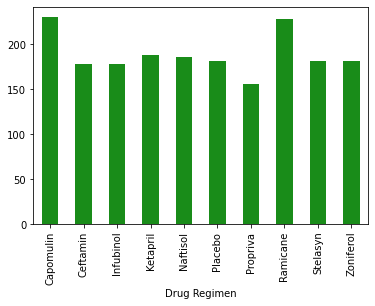

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total = cleaned_df.groupby(['Drug Regimen'])
total_measure = total['Tumor Volume (mm3)'].count()
total_measure_df = pd.DataFrame(total_measure)
total_measure_df
print(total_measure_df)
total_measure.plot.bar(y='Tumor Volume (mm3)', color='g', alpha=0.9, align="center")


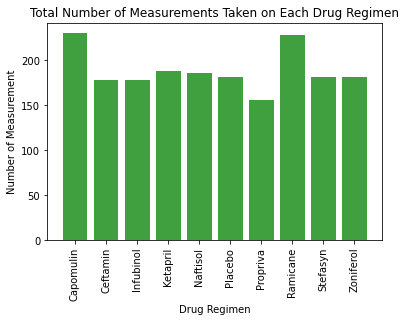

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
total = cleaned_df.groupby(['Drug Regimen'])
total_measure = total['Tumor Volume (mm3)'].count()
total_measure_df = pd.DataFrame(total_measure)
total_measure_df

x_axis = np.arange(len('total_measure_df'))
#plt.clf()
plt.bar(['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stefasyn','Zoniferol'], total_measure_df['Tumor Volume (mm3)'], color='g', alpha=0.75, align="center")
plt.xticks(rotation='vertical')
plt.title('Total Number of Measurements Taken on Each Drug Regimen')
plt.ylabel('Number of Measurement')
plt.xlabel('Drug Regimen')
plt.show()

        Mouse ID
Sex             
Female       930
Male         958


Text(0, 0.5, 'Sex Chart')

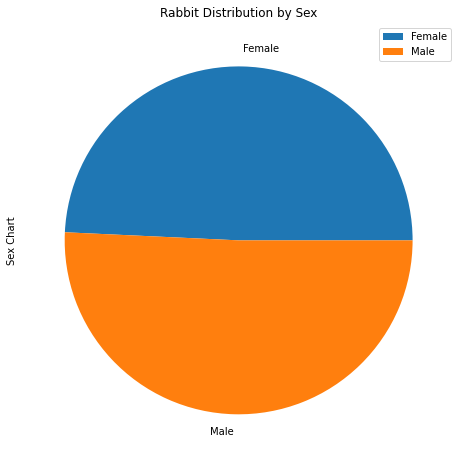

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Group the data by sex
sex_df = cleaned_df[['Mouse ID','Sex']].groupby(['Sex']).count()
print(sex_df)

sex_chart = sex_df.plot.pie(y='Mouse ID', title='Rabbit Distribution by Sex', figsize=(8, 8))
sex_chart.set_ylabel('Sex Chart')

        Mouse ID
Sex             
Female       930
Male         958


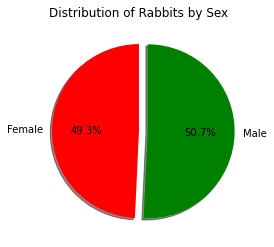

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group the data by sex
sex_df = cleaned_df[['Mouse ID','Sex']].groupby(['Sex']).count()
print(sex_df)

# Generate the pie chart shoow the male-female distribution of the rabbits
labels = ['Female', 'Male']
explode = (0.0, 0.1)
colors = ['red','green']
plt.pie(sex_df['Mouse ID'], autopct='%1.1f%%', labels=labels, explode = explode, colors=colors, startangle=90, shadow=True)

plt.title('Distribution of Rabbits by Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_vol = cleaned_df[['Mouse ID', 'Timepoint']].groupby(['Mouse ID']).max()
final_vol

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_vol_df = final_vol.merge(cleaned_df, how='left', on=['Mouse ID','Timepoint'])
tumor_vol_df = final_vol_df.drop(columns=['Timepoint'])
tumor_vol_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,67.973419,2
1,a251,Infubinol,Female,21,25,65.525743,1
2,a262,Placebo,Female,17,29,70.717621,4
3,a275,Ceftamin,Female,20,28,62.999356,3
4,a366,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,48.710661,0
245,z578,Ramicane,Male,11,16,30.638696,0
246,z581,Infubinol,Female,24,25,62.754451,3
247,z795,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
   
drug_treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []
# Locate the rows which contain mice on each drug and get the tumor volumes
for x in drug_treatment:
    temp = tumor_vol_df.loc[(tumor_vol_df['Drug Regimen'] == x), ['Tumor Volume (mm3)']]
    # add subset
    tumor_vol_data.append(temp)
tumor_vol_data

# I decided to put the elements of the list into their respective DataFrames
capomulin = (tumor_vol_data[0])
ramicane = tumor_vol_data[1]
infubinol = tumor_vol_data[2]
ceftamin = tumor_vol_data[3]

# Reset the index and drop the original index
capomulin = capomulin.reset_index(drop=True)
ramicane = ramicane.reset_index(drop=True)
infubinol = infubinol.reset_index(drop=True)
ceftamin = ceftamin.reset_index(drop=True)

# Rename the tumor volume columns to their respective regimens names 
cap = capomulin.rename(columns={'Tumor Volume (mm3)': 'capomulin'})
ram = ramicane.rename(columns={'Tumor Volume (mm3)': 'ramicane'})
inf = infubinol.rename(columns={'Tumor Volume (mm3)': 'infubinol'})
cef = ceftamin.rename(columns={'Tumor Volume (mm3)': 'ceftamin'})

# Combined all four to get  nice DataFrame I will use to compute the quantiles nd construct the boxplots
combined_tumor_vol = pd.concat([cap, ram, inf, cef], axis=1)
combined_tumor_vol.head() # Now I have a nice DataFrame to work with. 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Here I did the calculations one regimen at a time
# Calculating the Quartiles. 
# 1. Capomulin
quartiles = cap['capomulin'].quantile([0.25, 0.50, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = iqr - (1.5*iqr)
upper_bound = iqr + (1.5*iqr)

print(f"1. Results for the Camopulin Regimen")
print(f"------------------------------------------")
print(f"The lower quanrtile is {round(lowerq, 2)}")
print(f"The upper quanrtile is {round(upperq, 2)}")
print(f"The lower bound is {round(lower_bound, 2)}")
print(f"The upper bound is {round(upper_bound, 2)}")
print("")

# 2. Ramicane
quartiles = ram['ramicane'].quantile([0.25, 0.50, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = iqr - (1.5*iqr)
upper_bound = iqr + (1.5*iqr)

print(f"2. Results for the Ramicane Regimen")
print(f"------------------------------------------")
print(f"The lower quanrtile is {round(lowerq, 2)}")
print(f"The upper quanrtile is {round(upperq, 2)}")
print(f"The lower bound is {round(lower_bound, 2)}")
print(f"The upper bound is {round(upper_bound, 2)}")
print("")

# 3. Infubinol
quartiles = inf['infubinol'].quantile([0.25, 0.50, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = iqr - (1.5*iqr)
upper_bound = iqr + (1.5*iqr)

print(f"3. Results for the Infubinol Regimen")
print(f"------------------------------------------")
print(f"The lower quanrtile is {round(lowerq, 2)}")
print(f"The upper quanrtile is {round(upperq, 2)}")
print(f"The lower bound is {round(lower_bound, 2)}")
print(f"The upper bound is {round(upper_bound, 2)}")
print("")

# 4. Ceftamin
quartiles = cef['ceftamin'].quantile([0.25, 0.50, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = iqr - (1.5*iqr)
upper_bound = iqr + (1.5*iqr)

print(f"4. Results for the Ceftamin Regimen")
print(f"------------------------------------------")
print(f"The lower quanrtile is {round(lowerq, 2)}")
print(f"The upper quanrtile is {round(upperq, 2)}")
print(f"The lower bound is {round(lower_bound, 2)}")
print(f"The upper bound is {round(upper_bound, 2)}")

1. Results for the Camopulin Regimen
------------------------------------------
The lower quanrtile is 32.38
The upper quanrtile is 40.16
The lower bound is -3.89
The upper bound is 19.45

2. Results for the Ramicane Regimen
------------------------------------------
The lower quanrtile is 31.56
The upper quanrtile is 40.66
The lower bound is -4.55
The upper bound is 22.75

3. Results for the Infubinol Regimen
------------------------------------------
The lower quanrtile is 54.05
The upper quanrtile is 65.53
The lower bound is -5.74
The upper bound is 28.69

4. Results for the Ceftamin Regimen
------------------------------------------
The lower quanrtile is 48.72
The upper quanrtile is 64.3
The lower bound is -7.79
The upper bound is 38.94


## Line and Scatter Plots

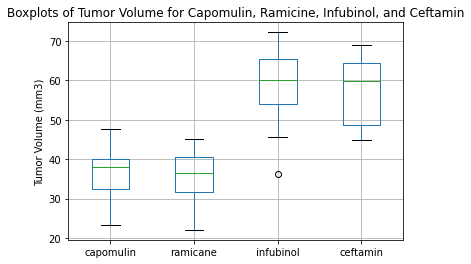

Infubinol has one outlier, the other three have no outliers.


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Plotting the boxplots for the four drug regimens
combined_tumor_vol.boxplot(['capomulin', 'ramicane', 'infubinol', 'ceftamin'])
plt.title('Boxplots of Tumor Volume for Capomulin, Ramicine, Infubinol, and Ceftamin')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

print(f"Infubinol has one outlier, the other three have no outliers.")

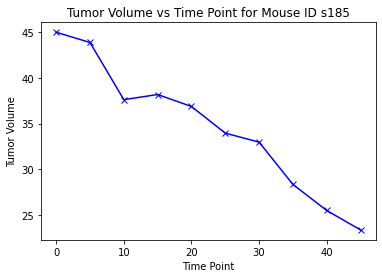

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Used loc to isolate the Capomulin regimen and a single mouse with Mouse ID s185
capomulin_data = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin') & (cleaned_df['Mouse ID'] == 's185')]


# Create the timepoint and tumor volum axes for s185 that was treated with capomulin
time_point = capomulin_data.iloc[:,5]
tumor_volume = capomulin_data.iloc[:,6]

# Plot the line graph, label the axes and give it a title
tumor_volume = plt.plot(time_point, tumor_volume, marker='x', color='b')
plt.title('Tumor Volume vs Time Point for Mouse ID s185')
plt.ylabel('Tumor Volume')
plt.xlabel('Time Point')
plt.show()




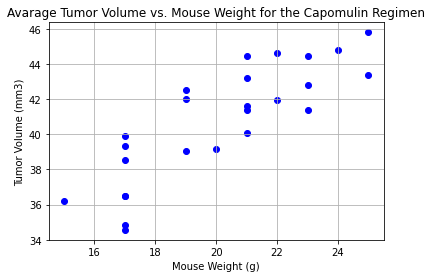

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Using loc to isolate the regimen capomulin and the used groupby to find the average tumor volume and weight
capomulin = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin')]
ave_tv_mw_cap = capomulin[['Tumor Volume (mm3)', 'Weight (g)', 'Mouse ID']].groupby(['Mouse ID']).mean()

# Plot a scatter plot of the average tumor volume and weight, labe the axes and give it a title
# Note: ave_tv_mw_cap = average tumor volume and mouse weight for the capomulin regimen
plt.scatter(ave_tv_mw_cap['Weight (g)'], ave_tv_mw_cap['Tumor Volume (mm3)'], marker='o', facecolors='blue')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Mouse Weight (g)')
plt.title('Avarage Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.grid()
plt.show()


## Correlation and Regression

The correlation coefficient between average tumor volume and mouse weight is 0.84
y = 0.95x + 21.55


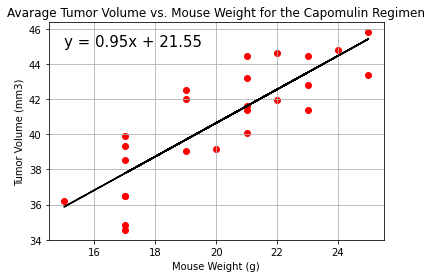

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#capomulin_data = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']

# prepare the series to be plotted on the x & y axes
mouse_weight = ave_tv_mw_cap.iloc[:,1]
tumor_volume = ave_tv_mw_cap.iloc[:,0]

# Calculate and print the correlation coefficient betetween average tumore volume and mouse weight
correlation = st.pearsonr(mouse_weight, tumor_volume)
print(f"The correlation coefficient between average tumor volume and mouse weight is {round(correlation[0],2)}")

# calculating values and constructing the regression line
x_values = ave_tv_mw_cap['Weight (g)']
y_values = ave_tv_mw_cap['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_volume)
regress_values = mouse_weight*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)

# Reproducing the scatter plot and inserting the regression line and equation
plt.scatter(x_values, y_values, marker='o', facecolors='r')
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(15,45),fontsize=15,color="black")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Mouse Weight (g)')
plt.title('Avarage Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.grid()
plt.show()